# Análise Exploratória de Dados (EDA)

## 1. Importar bibliotecas e carregar os dados pré-processados


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PROCESSED_PATH = "../data/ANA HIDROWEB/RIO MEIA PONTE/processed.csv"

df = pd.read_csv(PROCESSED_PATH, sep=";", parse_dates=["date"], dayfirst=True)
df.head()

,date,rain_upstream_mean,rain_upstream_max,rain_upstream_min,rain_upstream_q25,rain_upstream_q75,level_upstream_mean,level_upstream_max,level_upstream_min,level_upstream_q25,...,flow_after_max,flow_after_min,flow_after_q25,flow_after_q75,rain_upstream_acc_2_days,rain_downstream_acc_2_days,rain_after_acc_2_days,rain_upstream_acc_3_days,rain_downstream_acc_3_days,rain_after_acc_3_days
0,2014-01-01,0.000000,0.0,0.0,0.0,0.0,219.083333,222.0,216.0,217.0,...,70.8,65.4,66.60,69.60,0.000000,0.008696,0.0,0.000000,0.026087,0.0
1,2014-01-02,0.008696,0.2,0.0,0.0,0.0,222.956522,226.0,219.0,221.5,...,85.3,67.8,73.90,78.10,0.008696,0.217391,0.0,0.008696,0.226087,0.0
2,2014-01-03,0.000000,0.0,0.0,0.0,0.0,225.318182,231.0,219.0,220.5,...,78.7,63.0,67.95,76.30,0.008696,0.217391,0.0,0.008696,0.217391,0.0
3,2014-01-04,0.000000,0.0,0.0,0.0,0.0,213.863636,221.0,208.0,212.0,...,63.0,58.2,61.05,62.85,0.000000,0.000000,0.0,0.008696,0.217391,0.0
4,2014-01-05,0.000000,0.0,0.0,0.0,0.0,204.904762,208.0,201.0,204.0,...,58.2,53.4,55.80,57.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0


## 2. Plotar Histogramas

### **Conclusões**

- **Chuva:**  
    - Excesso de valores próximos de zero.
    - Cauda longa à direita.
    - Eventos de chuva intensa são raros.
    - Maioria dos registros corresponde a pouca ou nenhuma chuva.

- **Nível:**  
    - Distribuições mais simétricas.
    - Concentração em torno da média.
    - Reflete o nível normal do rio na maior parte do tempo.

- **Vazão:**  
    - Distribuição assimétrica.
    - Valores baixos ocorrem com mais frequência.
    - Valores altos são menos comuns.

<br>

> **Observações e Recomendações:**  
> As distribuições apresentam desbalanceamento, especialmente para chuva e vazão.  
> Recomenda-se aplicar técnicas de tratamento de dados para garantir análises mais robustas e evitar possíveis vieses.

In [2]:
def plot_histograms(df, columns, n_cols=3, bins=30, title="Histograms"):
    n_rows = int(np.ceil(len(columns) / n_cols))
    fig, axes = plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=(5 * n_cols, 4 * n_rows),
        constrained_layout=True,
    )
    fig.suptitle(title, fontsize=18)
    # Ensure axes is always a flat numpy array
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = np.array([axes])
    for i, col in enumerate(columns):
        df[col].hist(ax=axes[i], bins=bins, label=col)
        axes[i].legend()
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
    for j in range(len(columns), len(axes)):
        axes[j].set_visible(False)
    plt.show()


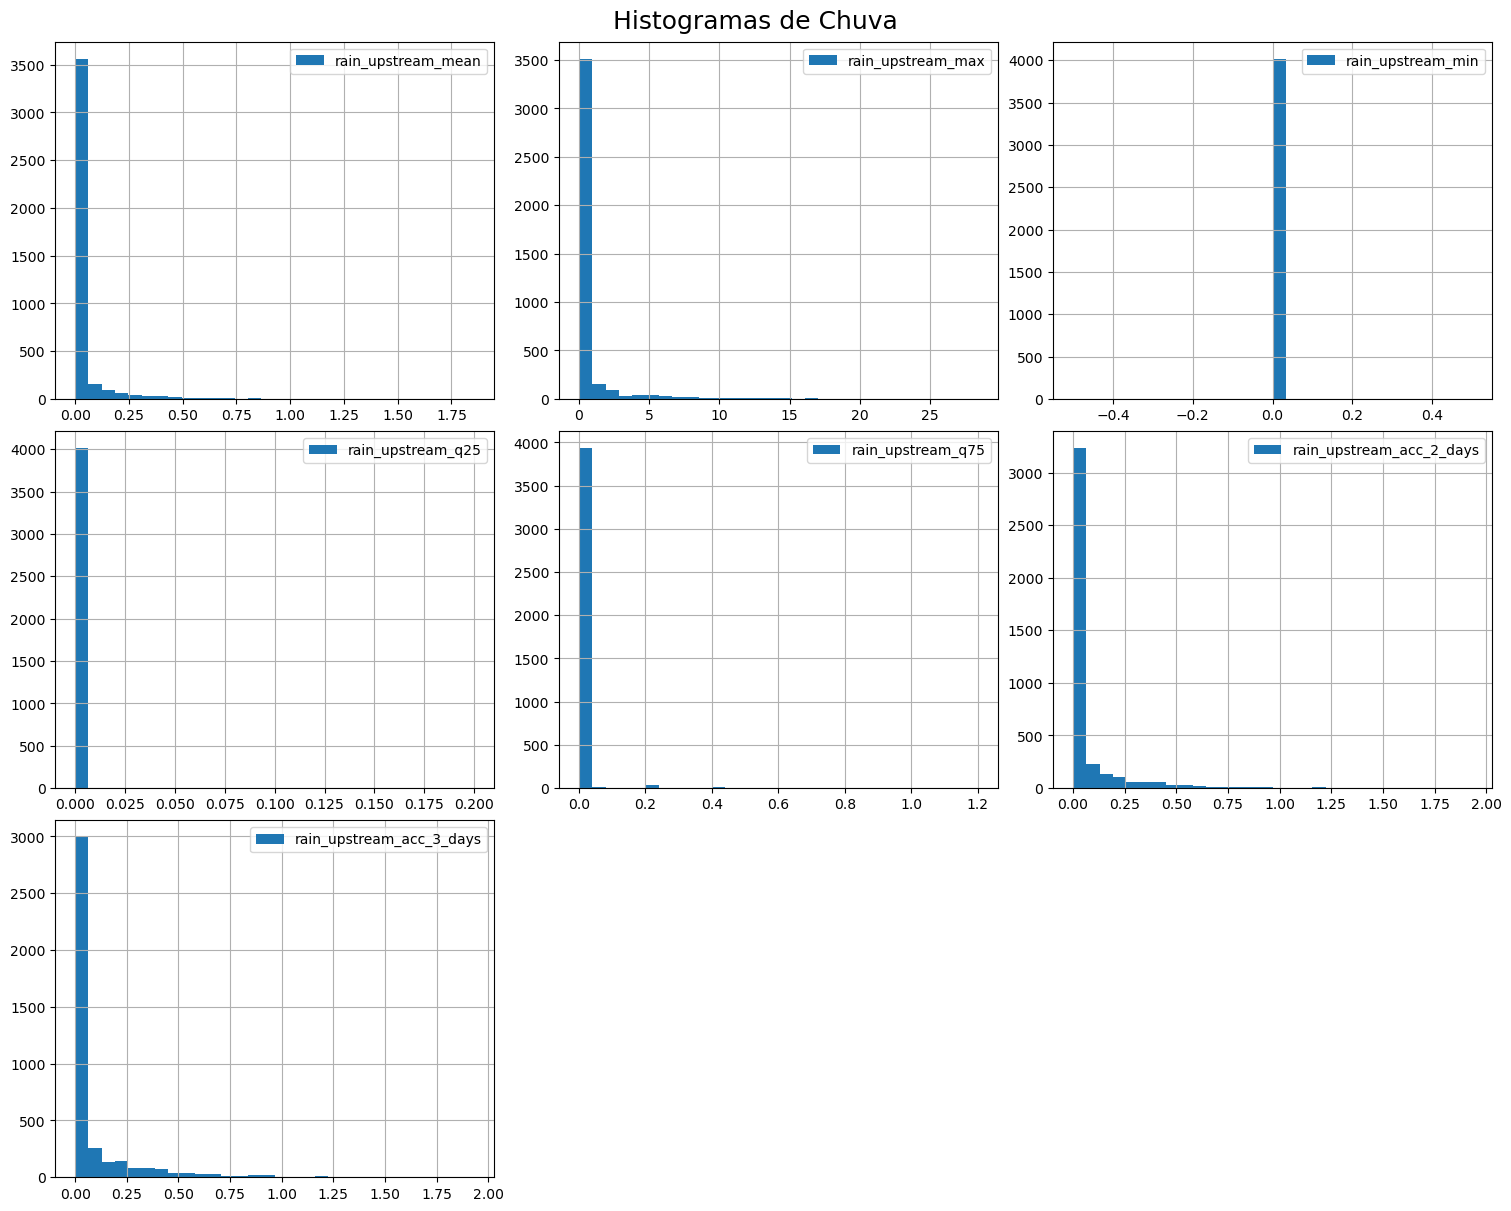

In [3]:

chuva_cols = [col for col in df.columns if col.startswith("rain_upstream")]
plot_histograms(df, chuva_cols, n_cols=3, bins=30, title="Histogramas de Chuva")

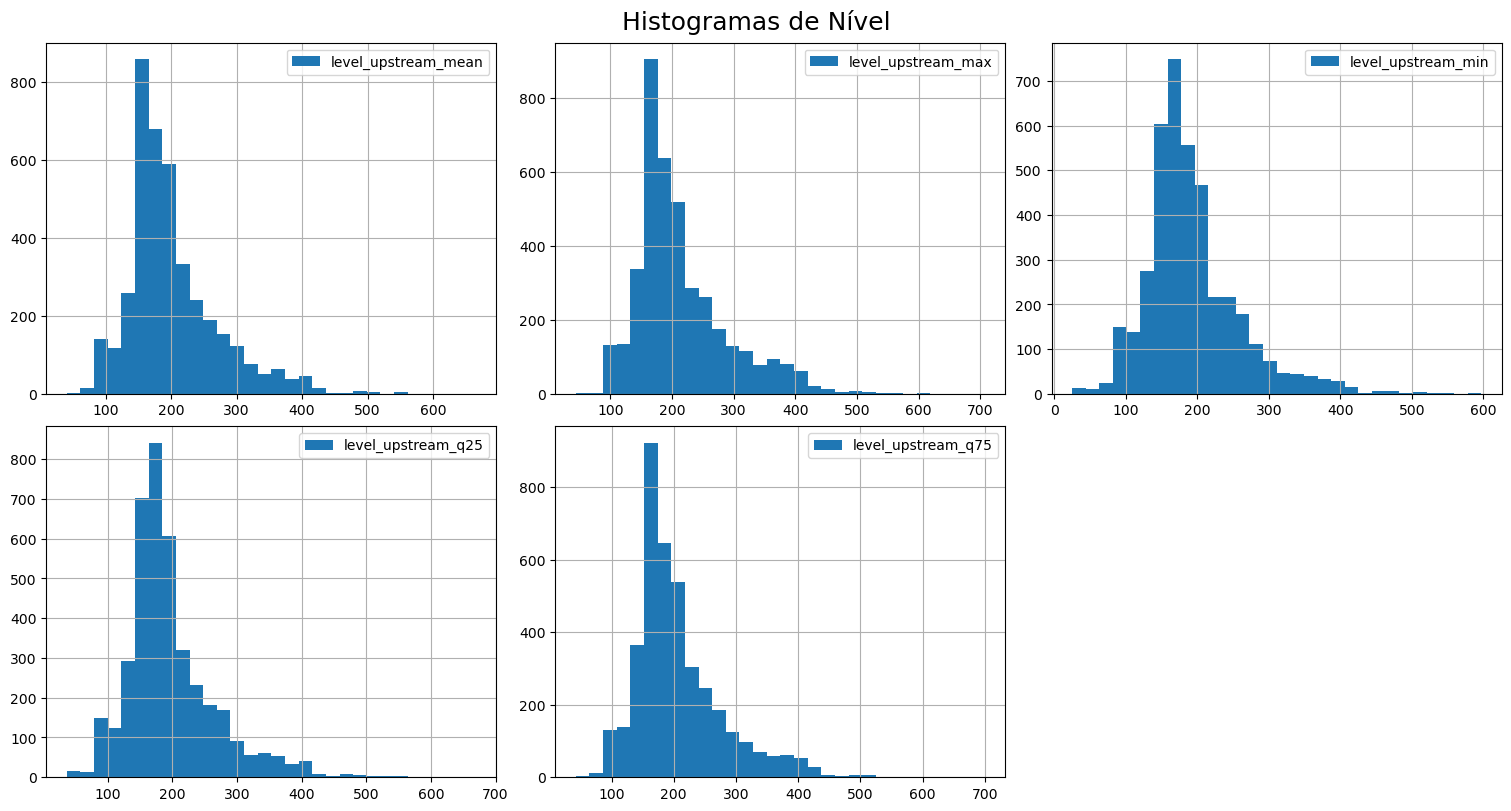

In [4]:
nivel_cols = [col for col in df.columns if col.startswith("level_upstream")]
plot_histograms(df, nivel_cols, n_cols=3, bins=30, title="Histogramas de Nível")

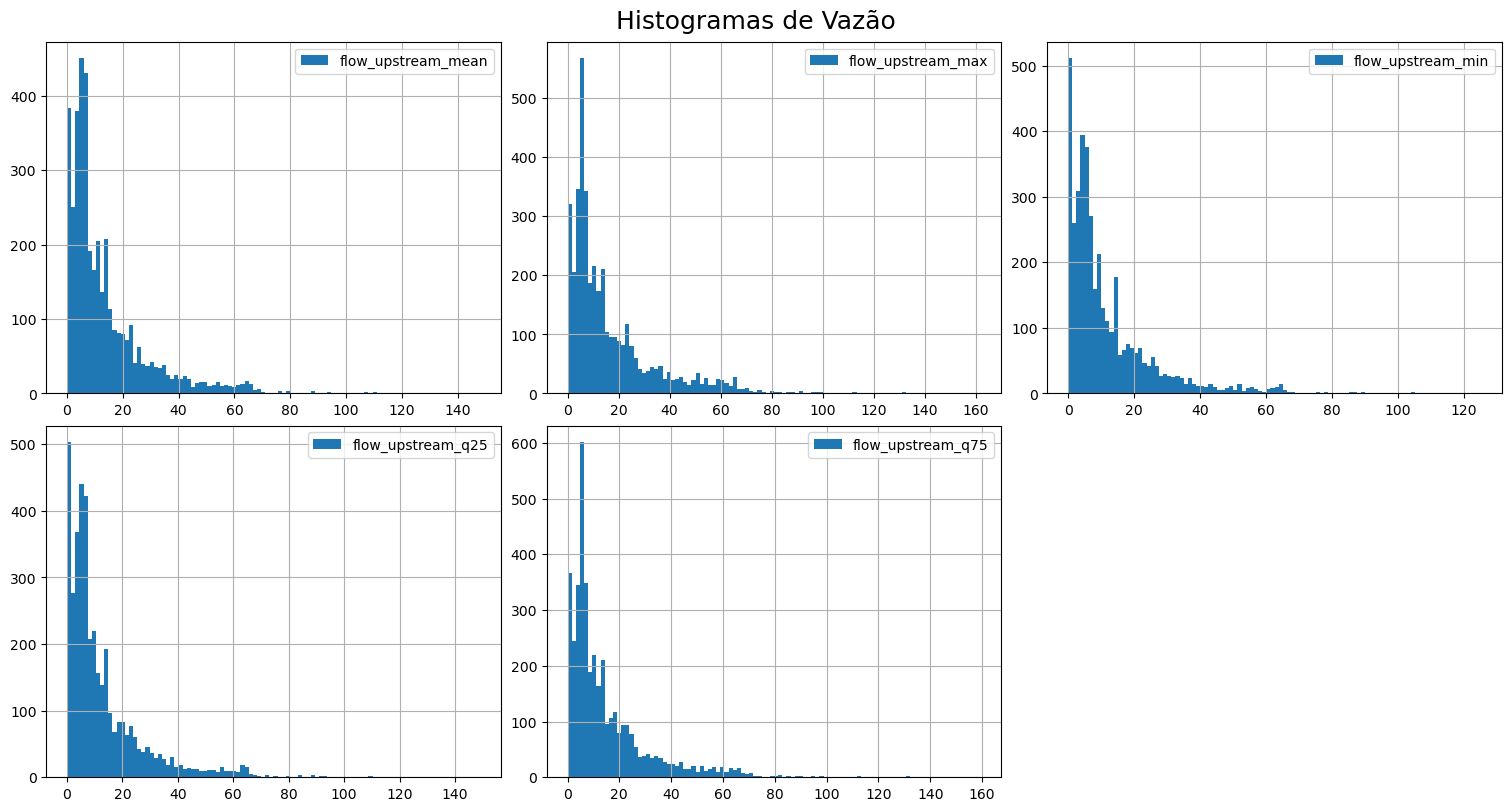

In [5]:
vazao_cols = [col for col in df.columns if "flow_upstream" in col]
plot_histograms(df, vazao_cols, n_cols=3, bins=100, title="Histogramas de Vazão")

## 3. Plotar Boxplots

## 4. Plotar Correlações

**Conclusões:**

- **Correlação entre variáveis:**  
    - Correlação fraca entre chuva e nível.
    - Correlação extremamente forte entre nível e vazão.
    - Correlação fraca entre chuva e vazão.

- **Observações e Recomendações:**  
    - A correlação entre nível e vazão é esperada, pois o nível do rio afeta diretamente a quantidade de água que flui.
    - Recomenda-se excluir variações de vazão no treinamento do modelo

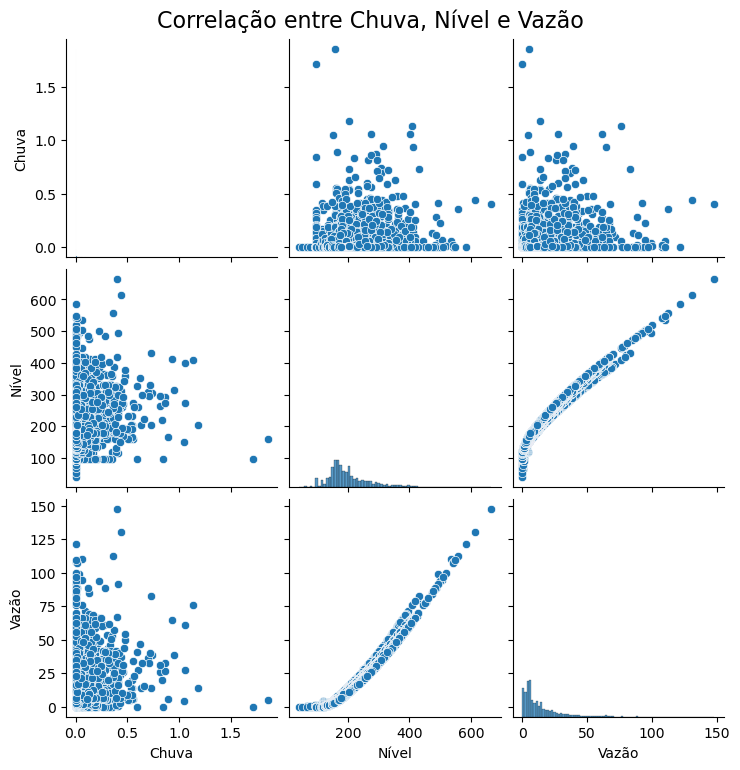

In [6]:
# Seleciona apenas as colunas de médias (apenas upstream)
mean_cols = [col for col in df.columns if "upstream_mean" in col and "acumulada" not in col]

# Mapeia os nomes das colunas para rótulos mais amigáveis
label_map = {
    "rain_upstream_mean": "Chuva",
    "level_upstream_mean": "Nível",
    "flow_upstream_mean": "Vazão"
}

# Renomeia as colunas para rótulos mais amigáveis
df_plot = df[mean_cols].rename(columns=label_map)

# Plota o pairplot com os novos rótulos
sns.pairplot(df_plot)
plt.suptitle("Correlação entre Chuva, Nível e Vazão", y=1.02, fontsize=16)
plt.show()

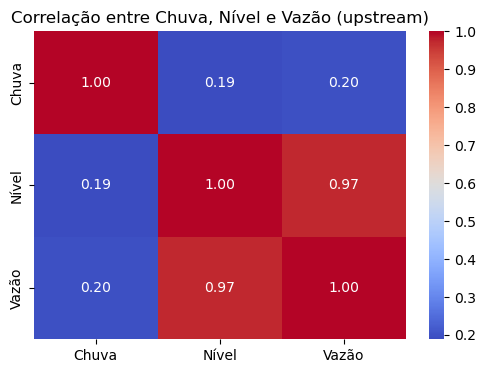

In [7]:
# Calcula a matriz de correlação entre as variáveis de média upstream
corr_matrix = df[mean_cols].corr()

# Renomeia as linhas e colunas da matriz de correlação
corr_matrix_labeled = corr_matrix.rename(index=label_map, columns=label_map)

# Plota o heatmap de correlação com os novos rótulos
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix_labeled, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Chuva, Nível e Vazão (upstream)")
plt.show()